# Prediction of Wild Blueberry Yield

[Here](https://www.kaggle.com/competitions/playground-series-s3e14/data)

In [7]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Read Input Data

In [8]:
data_path = "./data/input/"

train_df = pd.read_csv(data_path + "train.csv", index_col= 0 )
test_df = pd.read_csv(data_path + "test.csv", index_col= 0 )

### Verify DataType

In [9]:
train_df.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [10]:
test_df.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
dtype: object

### Verify Missing Values

In [11]:
train_df.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [12]:
test_df.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

### Describe Statistical Properties

In [13]:
train_df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [14]:
test_df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,19.795958,0.391606,0.286307,0.491328,0.593222,82.207014,49.697204,68.687816,59.256465,28.674779,48.592643,18.507360,0.322501,0.501809,0.446345,36.136349
std,6.591864,0.390022,0.059867,0.148166,0.139897,9.153442,5.552286,7.647629,6.617055,3.198282,5.395790,11.780074,0.165342,0.074707,0.037054,4.019885
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.233554,0.311921,24.320627
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.418867,33.231910
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.013557
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.472670,39.127263
max,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.139425


## Preprocessing

### Train Test Split

In [15]:
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

### Scaling Features 

In [16]:
scalar = StandardScaler()
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

### PCA

In [17]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


pca = PCA()
scaler = StandardScaler()
lr = Ridge()
pipe = Pipeline(
    steps=[
        ("scaler", scaler), 
        ("pca", pca), 
        ("lr", lr)
    ])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "pca__n_components": list(range(1, 17))
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.810):
{'pca__n_components': 11}


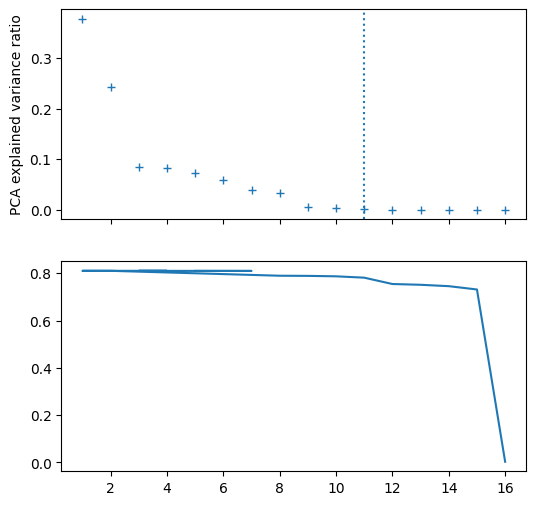

In [18]:
# Plot the PCA spectrum
pca.fit(X_train_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)

ax1.plot(search.cv_results_['rank_test_score'], search.cv_results_['mean_test_score'])

In [19]:
search.cv_results_

{'mean_fit_time': array([0.0892005 , 0.07439575, 0.07360554, 0.08739686, 0.0994031 ,
        0.09679565, 0.07159376, 0.07040057, 0.09040065, 0.10239778,
        0.09779863, 0.09800057, 0.04520316, 0.03740115, 0.0284049 ,
        0.02779932]),
 'std_fit_time': array([0.00982696, 0.00640976, 0.01247465, 0.00685786, 0.00948673,
        0.00370718, 0.00969923, 0.01202374, 0.00691582, 0.00868247,
        0.0065849 , 0.00666309, 0.00655617, 0.00706613, 0.00185119,
        0.00286025]),
 'mean_score_time': array([0.00820155, 0.00680065, 0.00559621, 0.00740104, 0.00739517,
        0.00740051, 0.00620294, 0.00680013, 0.00820737, 0.01040168,
        0.00800624, 0.00860496, 0.00839601, 0.00719452, 0.00479908,
        0.00459819]),
 'std_score_time': array([0.00203946, 0.00171853, 0.00119759, 0.00215681, 0.0008009 ,
        0.00206283, 0.00160939, 0.00133055, 0.00214212, 0.0013572 ,
        0.00227419, 0.00174353, 0.00286438, 0.00300135, 0.00116814,
        0.00120038]),
 'param_pca__n_components'

# Models

In [21]:
for i in range(1, 17):
    print(f"PCA - {i}")
    pca = PCA(n_components=i)
    scaler = StandardScaler()
    lr = GradientBoostingRegressor()
    pipe = Pipeline(
        steps=[
            ("scaler", scaler), 
            ("pca", pca), 
            ("lr", lr)
        ])

    pipe.fit(X_train, y_train)

    train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
    test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print("")

PCA - 1
Train MAE: 421.38259147068663
Test MAE: 427.097610870963

PCA - 2
Train MAE: 458.4288802499695
Test MAE: 472.95311349819116

PCA - 3
Train MAE: 422.52265626462207
Test MAE: 435.13325493460707

PCA - 4
Train MAE: 419.7121208820895
Test MAE: 430.4800694094093

PCA - 5
Train MAE: 412.05498656368
Test MAE: 424.97027686995364

PCA - 6
Train MAE: 378.52975326434563
Test MAE: 392.1472649851986

PCA - 7
Train MAE: 377.52130589016826
Test MAE: 391.89304952542443

PCA - 8
Train MAE: 377.4510144273554
Test MAE: 391.7257511212906

PCA - 9
Train MAE: 369.03360252170364
Test MAE: 388.5373889408756

PCA - 10


KeyboardInterrupt: 

In [22]:
original = pd.read_csv(data_path + "original.csv", index_col=0)

df = pd.concat([train_df, original])

X = df.drop(set(['MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'yield']), axis=1)
y = df.iloc[:,-1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024)

for i in range(2, 5):
    print(f"PCA - {i}")
    pca = PCA(n_components=i)
    scaler = StandardScaler()
    lr = GradientBoostingRegressor()
    pipe = Pipeline(
        steps=[
            ("scaler", scaler), 
            ("pca", pca), 
            ("lr", lr)
        ])

    pipe.fit(X_train, y_train)

    train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
    test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print("")

PCA - 2
Train MAE: 403.63970994203544
Test MAE: 408.00648734134853

PCA - 3
Train MAE: 400.22888757077567
Test MAE: 405.09034733475835

PCA - 4
Train MAE: 399.3703605137084
Test MAE: 404.06416390643193



In [25]:
pca = PCA(n_components=5)
scaler = StandardScaler()
lr = GradientBoostingRegressor()
pipe = Pipeline(
        steps=[
            ("scaler", scaler), 
            ("lr", lr)
        ])

pipe.fit(X_train, y_train)
    
train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")

# IMPROVE THIS

# Submission 1 
# Train MAE: 354.4782526775884
# Test MAE: 368.8311599417969

# Submission 2
# Train MAE: 343.6031741173103
# Test MAE: 353.0585439280637

Train MAE: 337.41944267835765
Test MAE: 332.3592986983095


In [26]:
X_test_unseen = test_df.drop(set(['MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays']), axis=1)

In [27]:
from datetime import datetime

now = datetime.now().strftime("%Y%m%d_%H%M%S")

output = pd.read_csv('./data/input/sample_submission.csv', index_col=0)
output['yield'] = pipe.predict(X_test_unseen)

output.to_csv(f"./data/output/test_predicted_gbr_{now}.csv", header=True, index=True)